In [1]:
 !pip install tensorflow keras numpy pandas matplotlib flask pillow


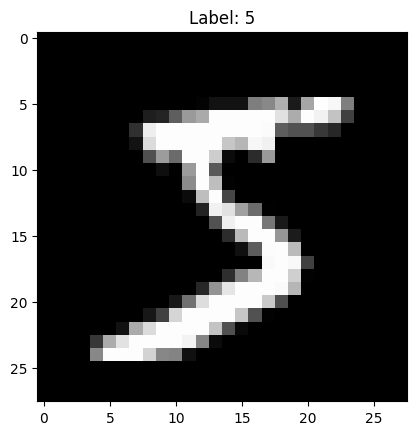

In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the first image in the training set
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()


In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [6]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 58s 30ms/step - loss: 0.1451 - accuracy: 0.9553 - val_loss: 0.0514 - val_accuracy: 0.9847
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0476 - accuracy: 0.9851 - val_loss: 0.0534 - val_accuracy: 0.9819
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.0339 - val_accuracy: 0.9876
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0325 - val_accuracy: 0.9889
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.0332 - val_accuracy: 0.9894


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 3s 8ms/step - loss: 0.0332 - accuracy: 0.9894
Test accuracy: 0.9894000291824341


In [8]:
model.save('mnist_cnn.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
from google.colab import files
files.download('mnist_cnn.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
import numpy as np
from keras.models import load_model

model = load_model('mnist_cnn.h5')

def predict_digit(img):
    img = img.resize((28, 28)).convert('L')
    img = np.array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32') / 255
    prediction = model.predict(img)
    return np.argmax(prediction)

# Save the function as a script
with open('predict.py', 'w') as f:
    f.write('''import numpy as np
from keras.models import load_model
from PIL import Image
model = load_model('mnist_cnn.h5')
def predict_digit(img):
    img = img.resize((28, 28)).convert('L')
    img = np.array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32') / 255
    prediction = model.predict(img)
    return np.argmax(prediction)''')


In [13]:
files.download('predict.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
from flask import Flask, request, render_template
import numpy as np
from keras.models import load_model
from PIL import Image
import io

app = Flask(__name__)
model = load_model('mnist_cnn.h5')

def predict_digit(img):
    img = img.resize((28, 28)).convert('L')
    img = np.array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32') / 255
    prediction = model.predict(img)
    return np.argmax(prediction)

@app.route("/", methods=["GET", "POST"])
def index():
    if request.method == "POST":
        file = request.files["file"]
        img = Image.open(io.BytesIO(file.read()))
        digit = predict_digit(img)
        return render_template("index.html", digit=digit)
    return render_template("index.html", digit=None)

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [15]:
# prompt: how save the above cell as app.py

%%writefile app.py
from keras.models import load_model
from PIL import Image
from flask import Flask, request, render_template
import io
import numpy as np

app = Flask(__name__)
model = load_model('mnist_cnn.h5')

def predict_digit(img):
    img = img.resize((28, 28)).convert('L')
    img = np.array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32') / 255
    prediction = model.predict(img)
    return np.argmax(prediction)

@app.route("/", methods=["GET", "POST"])
def index():
    if request.method == "POST":
        file = request.files["file"]
        img = Image.open(io.BytesIO(file.read()))
        digit = predict_digit(img)
        return render_template("index.html", digit=digit)

if __name__ == "__main__":
    app.run(debug=True)


Writing app.py


In [19]:
files.download('app.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>